# Bikeshare data analysis year 2019
## by Abdulrahman Osama

## Investigation Overview

> In this analysis, I worked on finding some insights and user preferences like the most common hour of the day, day of the week, month of the year and the average time duration of trips and how all of these are affected by the type of user and the city where the ride took place.

## Dataset Overview

> The dataset consists of around 6 million trips for the year 2019 and their information including the time duration of the trips in seconds, the start date and time, and the user type. I have collected the data for two cities San Francisco and Washington DC.

In [31]:
# import all packages and set plots to be embedded inline
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [32]:
# load in the dataset into a pandas dataframe
#reading San Francisco data and adding a column of the city name to the dataframe
files = glob.glob('FordGoBike/*.csv')
df1 = pd.DataFrame()
for file in files:
    df1 = df1.append(pd.read_csv(file, usecols = ['duration_sec', 'start_time', 'start_station_name', 'end_station_name', 'user_type'], dtype = {'duration_sec': 'Int64', 'start_time': object, 'start_station_name': object, 'end_station_name': object, 'user_type': object}))
df1['city'] = 'San Francisco'

#reading Washington DC data and adding a column of the city name to the dataframe
files = glob.glob('capitalbikeshare/*.csv')
df2 = pd.DataFrame()
for file in files:
    df2 = df2.append(pd.read_csv(file, usecols = ['Duration', 'Start date', 'Start station', 'End station', 'Member type'], dtype = {'Duration': 'Int64', 'Start date': object, 'Start station': object, 'End station': object, 'Member type': object}))
df2['city'] = 'Washington DC'

# Renaming the columns' names and removing rows that have null values of the two dataframes to be ready for combining
df1.rename(columns = {'duration_sec':'duration', 'start_station_name':'start_station', 'end_station_name':'end_station'}, inplace = True)
df1.dropna(axis = 0, inplace = True)
df2.rename(columns = {'Duration':'duration', 'Start date':'start_time', 'End date':'end_time', 'Start station':'start_station', 'End station':'end_station', 'Member type':'user_type'}, inplace = True)

#changing the values of user type column in the second dataframe to be as same as the first one
df2['user_type'] = df2['user_type'].map({'Member':'Subscriber', 'Casual':'Customer'})

#combining the two dataframes into one dataframe
df = df1.append(df2)

In [33]:
#converting start_time column to datetime type and extracting the hour, day, and month from it
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['start_time'].dt.hour
df['day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

## Trips duration distribution and its average

> The duration of trips has a very large range reaching to over 80000 seconds. When zooming in the histogram it we find it right skewed with average around 960 seconds

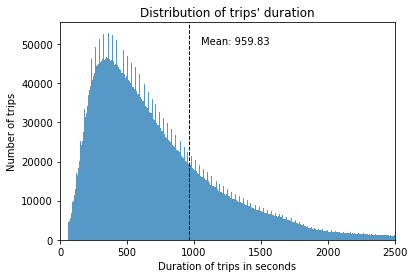

In [34]:
sns.histplot(data = df, x = 'duration')
plt.xlim([0, 2500])
plt.axvline(df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df['duration'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['duration'].mean()))
plt.title('Distribution of trips\' duration')
plt.xlabel('Duration of trips in seconds')
plt.ylabel('Number of trips');

## Average duration of trips by different user types, cities, and days of the week

> Average duration of trips is different among the two cities. Also the average duration differ from day to day among the week. Weekends have longer average of duration than weekdays but customers always tends to make longer rides than subscribers.

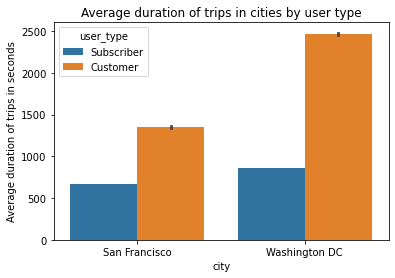

In [35]:
#creating bar plot for average duration for each user type by city
sns.barplot(data = df, x = 'city', y = 'duration', hue= 'user_type');
plt.title('Average duration of trips in cities by user type');
plt.ylabel('Average duration of trips in seconds');

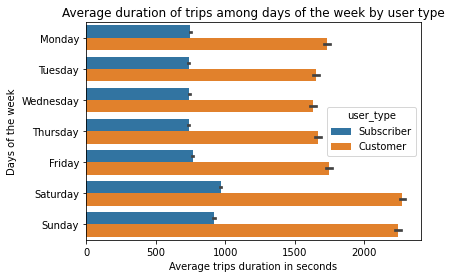

In [36]:
#average duration of trips on each day of the week by the user type
sns.barplot(data = df, y = 'day', x = 'duration', order = days, hue = 'user_type')
plt.title('Average duration of trips among days of the week by user type')
plt.xlabel('Average trips duration in seconds')
plt.ylabel('Days of the week');

## Number of trips Vs. hour of the day by type of user and different days of the week

> During week days, people are taking rides to and from work creating two peaks one in the morning at 8:00 AM and the other at 17:00. While during weekends, people are taking longer rides normally distributed over the day from morning to midnight.

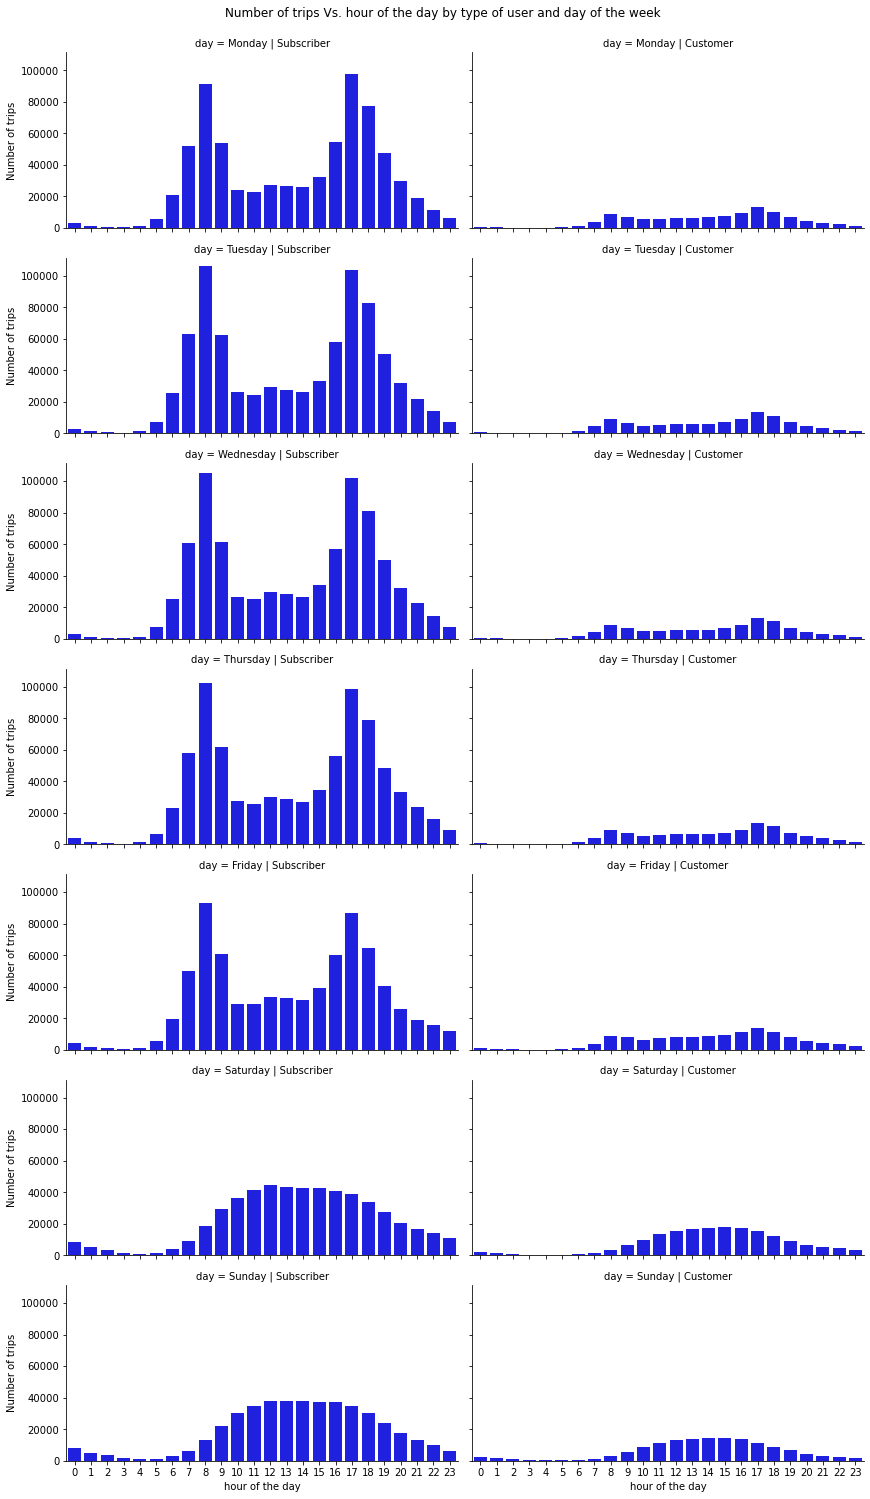

In [37]:
#number of trips over each hour of the day by day of the week and type of user
g = sns.FacetGrid(df, col = 'user_type', row='day',  row_order = days, height=3, aspect=2)
g.map_dataframe(sns.countplot, x='hour', color='blue', order = hours)
g.set_titles(col_template='{col_name}')
g.set_axis_labels('hour of the day', "Number of trips")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Number of trips Vs. hour of the day by type of user and day of the week', y = 0.98);


## Number of trips Vs. day of the week by type of user and the city

> For subscribers week days are more common to take rides than week ends in both cities, while for customers week ends are more common in Washington DC while in San Francisco all days are nearly the same.

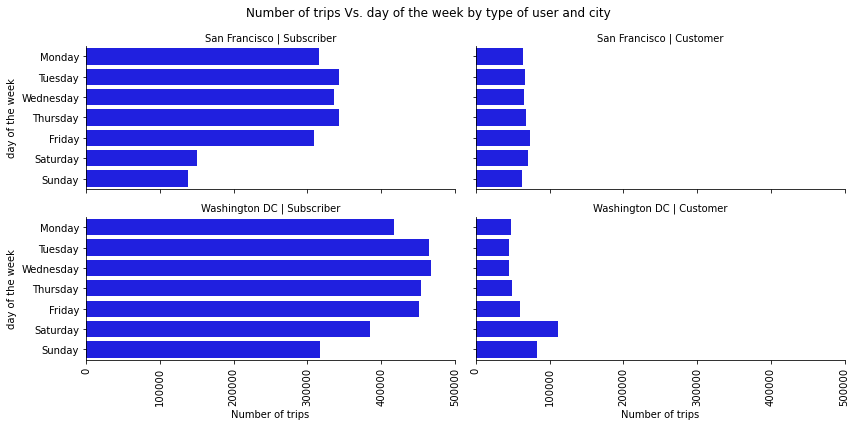

In [38]:
#number of trips vs day of the week by user type and city
g = sns.FacetGrid(df, col = 'user_type', row = 'city', height=3, aspect=2)
g.map_dataframe(sns.countplot, y='day', color='blue', order = days)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_axis_labels("Number of trips", 'day of the week')
g.set_xticklabels(rotation = 90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of trips Vs. day of the week by type of user and city')
plt.tight_layout()

In [43]:
!jupyter nbconvert slides_bikeshare.ipynb --to slides --no-input --no-prompt --SlidesExporter.reveal_scroll=True

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slides_bikeshare.ipynb to slides
[NbConvertApp] Writing 741335 bytes to slides_bikeshare.slides.html
